In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('placement.csv')

In [5]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Package')

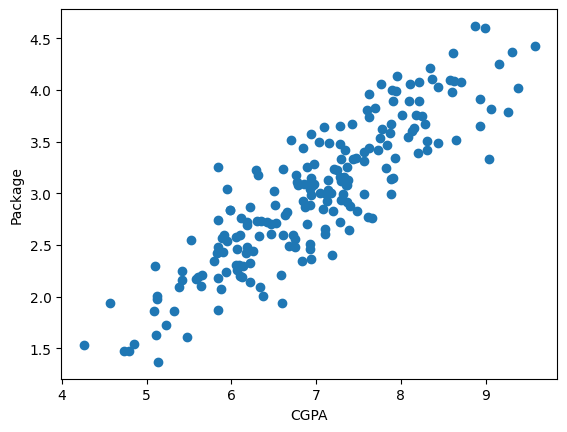

In [6]:
plt.scatter(df["cgpa"], df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package')

In [7]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [9]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [10]:
lr.fit(X_train, y_train)

LinearRegression()

In [11]:
# X_test.iloc[0].values.reshape(1, 1)
lr.predict(X_test.iloc[0].values.reshape(1, 1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.89111601])

Text(0, 0.5, 'Package')

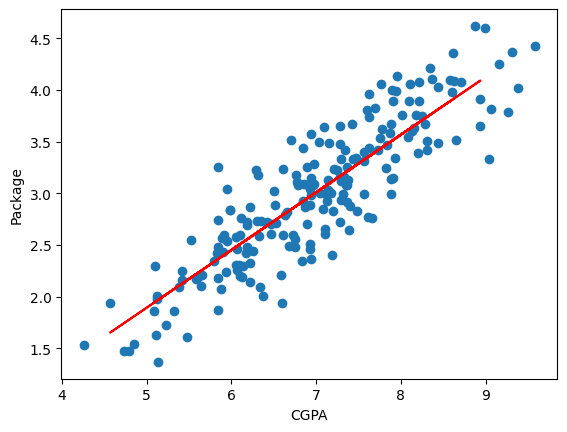

In [12]:
plt.scatter(df["cgpa"], df['package'])
plt.plot(X_test, lr.predict(X_test), color = 'red')
plt.xlabel('CGPA')
plt.ylabel('Package')

In [13]:
m = lr.coef_
m

array([0.55795197])

In [14]:
c = lr.intercept_
c
# line eq --> y = mx + c

-0.8961119222429144

how to do linear regression through <br>
OLS or direct formula<br>
used in 1D or simple or less data<br>

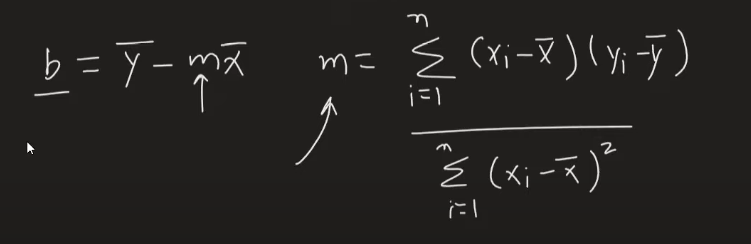

creating our own class for for the same to do what linear regression doo

In [15]:
class MeraLr:
  def __init__(self):
    self.m  = None
    self.b  = None

  def fit(self, X_train, y_train):
    num = 0
    den = 0
    for i in range(X_train.shape[0]):
      num = (X_train[i] - X_train.mean()) * (y_train[i] - y_train.mean())
      den = (X_train[i] - X_train.mean()) * (X_train[i] - X_train.mean())
    self.m = num / den
    self.b = y_train.mean() - (self.m * X_train.mean())

  def predict(self, X_test):
    return((self.m * X_test)+self.b)

In [16]:
X = df.iloc[:,0].values
y = df.iloc[:,-1].values

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [18]:
lr = MeraLr()
lr.fit(X_train,y_train)

In [19]:
lr.predict(X_test[0])

3.498239147622454

multiple linear regression
formula for n column

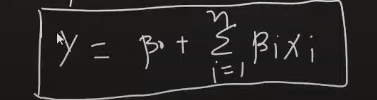

In [20]:
from sklearn.datasets import make_regression
import plotly.express as px
import plotly.graph_objects as go

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [21]:
X,y = make_regression(n_samples=100, n_features=2, n_informative=2, n_targets=1, noise=50)

In [22]:
df = pd.DataFrame({'feature1':X[:,0],'feature2':X[:,1],'target':y})

In [23]:
fig = px.scatter_3d(df, x='feature1', y='feature2', z='target')

fig.show()

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=3)
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [25]:
y_pred = lr.predict(X_test)

In [26]:
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("R2 score",r2_score(y_test,y_pred))

MAE 37.043221189877784
MSE 2206.5356977392858
R2 score 0.7150672991453453


making plane in virtualization just dont focus for now

In [27]:
x = np.linspace(-5, 5, 10)
y = np.linspace(-5, 5, 10)
xGrid, yGrid = np.meshgrid(y, x)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T
z_final = lr.predict(final).reshape(10,10)

z = z_final


In [28]:
fig = px.scatter_3d(df, x='feature1', y='feature2', z='target')

fig.add_trace(go.Surface(x = x, y = y, z =z ))

fig.show()

In [29]:
lr.coef_  #we get two coffecient due to 3d and according to eq we should have two coff

array([45.4821179 , 90.39448239])

In [30]:
lr.intercept_

-0.5965833202357711

mathamatical intution off multiple regression

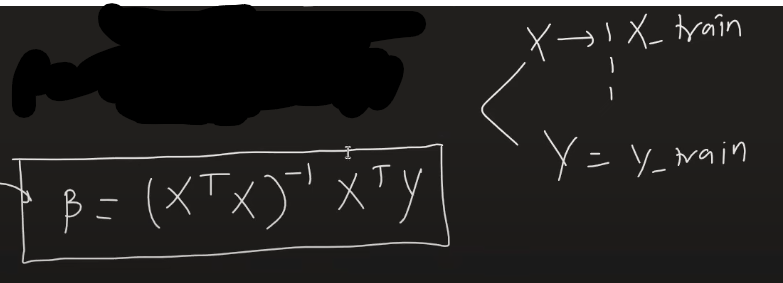

In [31]:
from sklearn.datasets import load_diabetes

In [32]:
X,y = load_diabetes(return_X_y=True)

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In linear regression, the R-squared score, also known as the coefficient of determination, is a statistical measure that indicates how well a regression line fits the actual data:

In [35]:
from sklearn.metrics import r2_score
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.4399338661568968

In [36]:
reg.coef_

array([  -9.15865318, -205.45432163,  516.69374454,  340.61999905,
       -895.5520019 ,  561.22067904,  153.89310954,  126.73139688,
        861.12700152,   52.42112238])

In [37]:
reg.intercept_

151.88331005254167

Creating own class

In [38]:
class MeraLR:

    def __init__(self):
        self.coef_ = None
        self.intercept_ = None

    def fit(self,X_train,y_train):
        X_train = np.insert(X_train,0,1,axis=1)

        # calcuate the coeffs
        betas = np.linalg.inv(np.dot(X_train.T,X_train)).dot(X_train.T).dot(y_train)
        self.intercept_ = betas[0]
        self.coef_ = betas[1:]

    def predict(self,X_test):
        y_pred = np.dot(X_test,self.coef_) + self.intercept_
        return y_pred

In [39]:
lr = MeraLR()
lr.fit(X_train,y_train)

In [40]:
y_pred = lr.predict(X_test)

In [41]:
r2_score(y_test,y_pred)

0.43993386615689634

In [42]:
lr.coef_

array([  -9.15865318, -205.45432163,  516.69374454,  340.61999905,
       -895.5520019 ,  561.22067904,  153.89310954,  126.73139688,
        861.12700152,   52.42112238])

In [43]:
lr.intercept_

151.88331005254165

Polynomial Regression

In [44]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,SGDRegressor

from sklearn.preprocessing import PolynomialFeatures,StandardScaler

from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline

In [45]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

# y = 0.8x^2 + 0.9x + 2

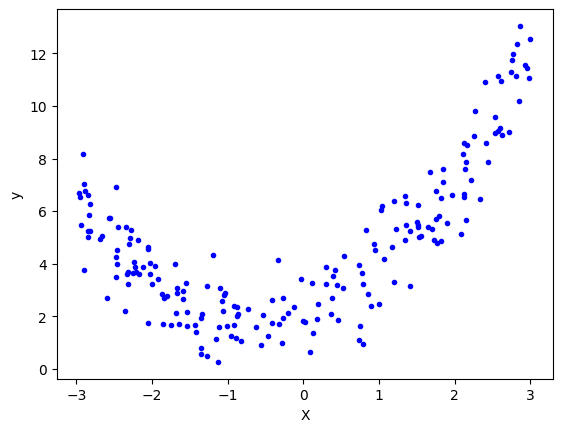

In [46]:
plt.plot(X, y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [48]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [49]:
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.16337634552461988

very less r2 score due to non linear data


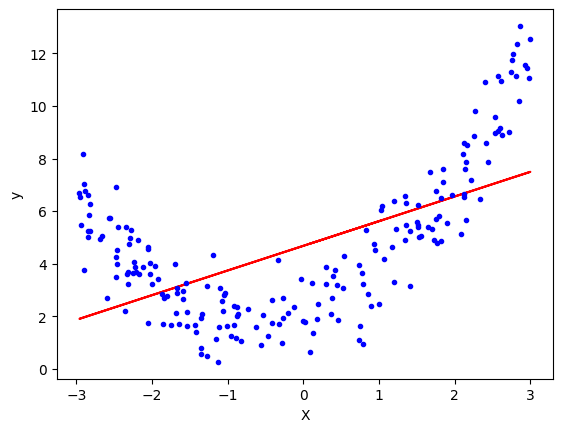

In [50]:
plt.plot(X_train,lr.predict(X_train),color='r')
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

applying polyomial linear regression

In [51]:
poly = PolynomialFeatures(degree=2,include_bias=True)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [52]:
print(X_train[0])
print(X_train_trans[0])

[1.03689114]
[1.         1.03689114 1.07514324]


                                    bias term

In [53]:
lr = LinearRegression()
lr.fit(X_train_trans,y_train)

LinearRegression()

In [54]:
y_pred = lr.predict(X_test_trans)

In [55]:
r2_score(y_test,y_pred)

0.8789538708570779

In [56]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.96993103 0.78860406]]
[2.09871027]


In [57]:
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

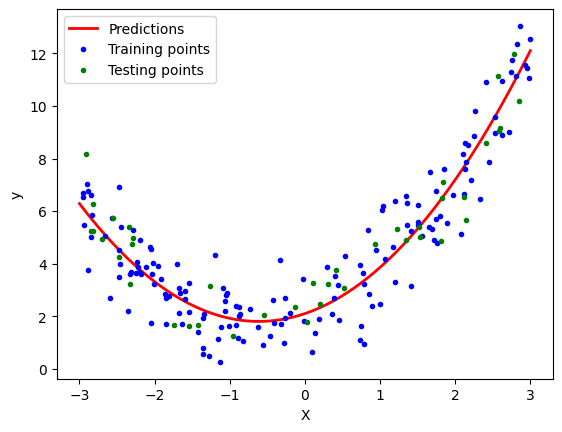

In [58]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

no need to understand below code just it is used to chek how the graf change as we change the degree<br><br>
it is actually usefull to see what underfit and overfit can doo.

In [59]:
def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

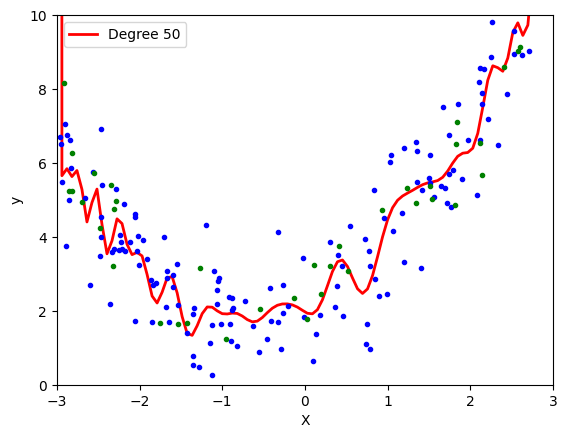

In [61]:
polynomial_regression(50)

In [62]:
poly.powers_

array([[0],
       [1],
       [2]])

multiple column linear regression on poly curve

In [63]:
# 3D polynomial regression
x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8

z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y +2 + np.random.randn(100, 1)
# z = x^2 + y^2 + 0.2x + 0.2y + 0.1xy + 2

In [64]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.show()

In [65]:
lr = LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)

x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)
xGrid, yGrid = np.meshgrid(x_input,y_input)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

z_final = lr.predict(final).reshape(10,10)

In [66]:
import plotly.graph_objects as go

fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final ))

fig.show()

as seen above the plane is not suitable for it soo we need a poly func to correct it and make it more acurate

In [67]:
X_multi = np.array([x,y]).reshape(100,2)
X_multi.shape

(100, 2)

In [68]:
poly = PolynomialFeatures(degree=30)
X_multi_trans = poly.fit_transform(X_multi)

In [70]:
print("Input", poly.n_features_in_)
print("Ouput", poly.n_output_features_)
print("Powers\n", poly.powers_)

Input 2
Ouput 496
Powers
 [[ 0  0]
 [ 1  0]
 [ 0  1]
 [ 2  0]
 [ 1  1]
 [ 0  2]
 [ 3  0]
 [ 2  1]
 [ 1  2]
 [ 0  3]
 [ 4  0]
 [ 3  1]
 [ 2  2]
 [ 1  3]
 [ 0  4]
 [ 5  0]
 [ 4  1]
 [ 3  2]
 [ 2  3]
 [ 1  4]
 [ 0  5]
 [ 6  0]
 [ 5  1]
 [ 4  2]
 [ 3  3]
 [ 2  4]
 [ 1  5]
 [ 0  6]
 [ 7  0]
 [ 6  1]
 [ 5  2]
 [ 4  3]
 [ 3  4]
 [ 2  5]
 [ 1  6]
 [ 0  7]
 [ 8  0]
 [ 7  1]
 [ 6  2]
 [ 5  3]
 [ 4  4]
 [ 3  5]
 [ 2  6]
 [ 1  7]
 [ 0  8]
 [ 9  0]
 [ 8  1]
 [ 7  2]
 [ 6  3]
 [ 5  4]
 [ 4  5]
 [ 3  6]
 [ 2  7]
 [ 1  8]
 [ 0  9]
 [10  0]
 [ 9  1]
 [ 8  2]
 [ 7  3]
 [ 6  4]
 [ 5  5]
 [ 4  6]
 [ 3  7]
 [ 2  8]
 [ 1  9]
 [ 0 10]
 [11  0]
 [10  1]
 [ 9  2]
 [ 8  3]
 [ 7  4]
 [ 6  5]
 [ 5  6]
 [ 4  7]
 [ 3  8]
 [ 2  9]
 [ 1 10]
 [ 0 11]
 [12  0]
 [11  1]
 [10  2]
 [ 9  3]
 [ 8  4]
 [ 7  5]
 [ 6  6]
 [ 5  7]
 [ 4  8]
 [ 3  9]
 [ 2 10]
 [ 1 11]
 [ 0 12]
 [13  0]
 [12  1]
 [11  2]
 [10  3]
 [ 9  4]
 [ 8  5]
 [ 7  6]
 [ 6  7]
 [ 5  8]
 [ 4  9]
 [ 3 10]
 [ 2 11]
 [ 1 12]
 [ 0 13]
 [14  0]
 [13  1]
 [12  2]
 [

In [71]:
X_multi_trans.shape

(100, 496)

In [72]:
lr = LinearRegression()
lr.fit(X_multi_trans,z)

LinearRegression()

In [73]:
X_test_multi = poly.transform(final)

In [74]:
z_final = lr.predict(X_multi_trans).reshape(10,10)

In [75]:
fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final))

fig.update_layout(scene = dict(zaxis = dict(range=[0,35])))

fig.show()